cluster
 1    288
 0    138
-1     14
Name: count, dtype: int64



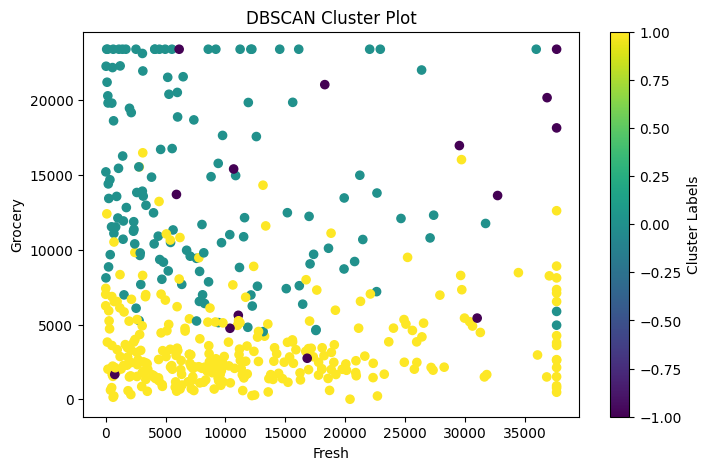

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# ==============================
# 1. LOAD AND PREPARE DATASET
# ==============================

# Load dataset
df = pd.read_csv("ML470_S8_Wholesale Customers data_Practice.csv")

# Select only numeric columns (exact columns)
cols = [
    "Channel",
    "Region",
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen"
]

df_num = df[cols].round(2)

# ==============================
# 2. OUTLIER TREATMENT (IQR)
# ==============================

def iqr_capping(data):
    capped = data.copy().astype(float)

    for col in capped.columns:
        Q1 = capped[col].quantile(0.25)
        Q3 = capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        capped[col] = np.where(
            capped[col] < lower, lower,
            np.where(capped[col] > upper, upper, capped[col])
        )

    return capped.round(2)

df_capped = iqr_capping(df_num)

# ==============================
# 3. REMOVE HIGHLY CORRELATED FEATURE
# ==============================

# As specified: remove Detergents_Paper
df_reduced = df_capped.drop(columns=["Detergents_Paper"])

# ==============================
# 4. STANDARDIZATION
# ==============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced)

# ==============================
# 5. APPLY DBSCAN
# ==============================

dbscan = DBSCAN(eps=2, min_samples=5)
cluster_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["cluster"] = cluster_labels

# ==============================
# 6. CLUSTER DISTRIBUTION
# ==============================

print(df["cluster"].value_counts())
print()

# ==============================
# 7. DBSCAN CLUSTER PLOT
# ==============================

plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df_capped["Fresh"],
    df_capped["Grocery"],
    c=cluster_labels,
    cmap="viridis",
    s=35
)
plt.colorbar(scatter, label="Cluster Labels")
plt.title("DBSCAN Cluster Plot")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()
